# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import datetime


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code.upper()
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

# Print the city count to confirm sufficient count
print(f"lenth of cities is: {len(cities)} and the length of countries is: {len(countries)}.")

lenth of cities is: 611 and the length of countries is: 611.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "imperial", "appid": api_key}
summary = ["name", "clouds.all", "dt", "main.humidity", "coord.lat",  "coord.lon", "main.temp_max", "wind.speed"]

    
# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

record = 1
loop_set = 1


for c in cities:
    try:
        current_weather = owm.get_current(str(c), **settings)
        time.sleep(3)
        data = current_weather(*summary)
        print(f"Processing Record {record} of Set {loop_set}| {c}")
        City.append(data[0])
        Country.append(citipy.nearest_city(data[4], data[5]).country_code.upper())
        Cloudiness.append(data[1])
        Date.append(data[2])
        Humidity.append(data[3])
        Lat.append(data[4])
        Lng.append(data[5])
        Max_Temp.append(data[6])
        Wind_Speed.append(data[7])
    except Exception as e:
        print(f"{c} not found")
    record = record + 1
    loop_set = loop_set + 1


    
print(record)
#print(cities)   
#print(data)
#print(data[0])
#city2 = citipy.nearest_city(34.64, -120.46)
#city2.country_code.upper()

Processing Record 1 of Set 1| provideniya
Processing Record 2 of Set 2| jamestown
Processing Record 3 of Set 3| davila
Processing Record 4 of Set 4| chokurdakh
Processing Record 5 of Set 5| atbasar
Processing Record 6 of Set 6| snezhnogorsk
Processing Record 7 of Set 7| keti bandar
Processing Record 8 of Set 8| rikitea
Processing Record 9 of Set 9| vanavara
Processing Record 10 of Set 10| hilo
taolanaro not found
Processing Record 12 of Set 12| zhezkazgan
Processing Record 13 of Set 13| te anau
Processing Record 14 of Set 14| hobart
Processing Record 15 of Set 15| new norfolk
Processing Record 16 of Set 16| homer
kuah not found
Processing Record 18 of Set 18| tuktoyaktuk
Processing Record 19 of Set 19| santa quiteria
Processing Record 20 of Set 20| port lincoln
Processing Record 21 of Set 21| sur
Processing Record 22 of Set 22| thompson
Processing Record 23 of Set 23| cidreira
Processing Record 24 of Set 24| souillac
Processing Record 25 of Set 25| bluff
Processing Record 26 of Set 26|

Processing Record 209 of Set 209| gao
Processing Record 210 of Set 210| petropavlovsk-kamchatskiy
Processing Record 211 of Set 211| zwedru
Processing Record 212 of Set 212| zyryanka
Processing Record 213 of Set 213| alta floresta
Processing Record 214 of Set 214| codrington
Processing Record 215 of Set 215| havoysund
Processing Record 216 of Set 216| chuy
Processing Record 217 of Set 217| san quintin
Processing Record 218 of Set 218| norman wells
Processing Record 219 of Set 219| grindavik
Processing Record 220 of Set 220| rumoi
Processing Record 221 of Set 221| tondi
Processing Record 222 of Set 222| north branch
Processing Record 223 of Set 223| dunedin
Processing Record 224 of Set 224| grootfontein
Processing Record 225 of Set 225| muli
Processing Record 226 of Set 226| westport
Processing Record 227 of Set 227| constitucion
Processing Record 228 of Set 228| saint george
Processing Record 229 of Set 229| manavalakurichi
Processing Record 230 of Set 230| neftcala
Processing Record 23

Processing Record 407 of Set 407| almenara
Processing Record 408 of Set 408| hobyo
Processing Record 409 of Set 409| xingyi
Processing Record 410 of Set 410| christchurch
Processing Record 411 of Set 411| weligama
Processing Record 412 of Set 412| katubao
Processing Record 413 of Set 413| hamilton
Processing Record 414 of Set 414| sao joao da barra
Processing Record 415 of Set 415| polunochnoye
Processing Record 416 of Set 416| dafeng
sakakah not found
Processing Record 418 of Set 418| phibun mangsahan
Processing Record 419 of Set 419| vestmannaeyjar
Processing Record 420 of Set 420| portland
Processing Record 421 of Set 421| farafangana
Processing Record 422 of Set 422| sechura
Processing Record 423 of Set 423| torbay
andenes not found
Processing Record 425 of Set 425| kostomuksha
Processing Record 426 of Set 426| riberalta
Processing Record 427 of Set 427| deep river
Processing Record 428 of Set 428| prieska
Processing Record 429 of Set 429| skibbereen
Processing Record 430 of Set 43

Processing Record 606 of Set 606| alyangula
Processing Record 607 of Set 607| luanda
Processing Record 608 of Set 608| santa cruz
Processing Record 609 of Set 609| zharkent
Processing Record 610 of Set 610| tecolutla
Processing Record 611 of Set 611| henties bay
612


In [4]:
#convert Date
#Date2 = []
#for j in Date:
    #j = datetime.datetime.fromtimestamp(j).strftime('%m-%d-%Y')
    #Date2.append(j)
#print(Date2)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country":Country,
    "Date": Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("output_data.csv", header= True, index= False)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,90,RU,1561608265,87,64.42,-173.23,51.80,11.18
1,Jamestown,0,AU,1561608269,49,-33.21,138.60,64.49,16.24
2,Davila,20,PH,1561608272,74,18.47,120.58,87.80,13.87
3,Chokurdakh,0,RU,1561607785,31,70.62,147.90,67.19,15.48
4,Atbasar,0,KZ,1561608278,71,51.81,68.36,56.57,9.51
5,Snezhnogorsk,0,RU,1561608281,66,69.19,33.23,55.40,4.47
6,Keti Bandar,36,PK,1561608284,82,24.14,67.45,84.47,18.84
7,Rikitea,0,PF,1561608288,81,-23.12,-134.97,74.21,10.65
8,Vanavara,0,RU,1561608291,34,60.35,102.28,81.41,4.23
9,Hilo,90,US,1561608294,65,19.71,-155.08,82.40,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

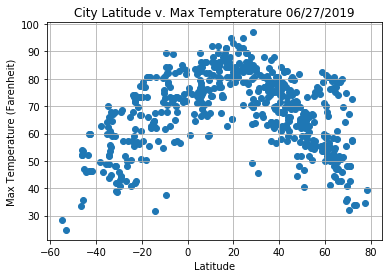

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
todaydate = pd.datetime.now().strftime("%m/%d/%Y")
plt.title(f"City Latitude v. Max Tempterature {todaydate}")
plt.ylabel("Max Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude v. Max Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

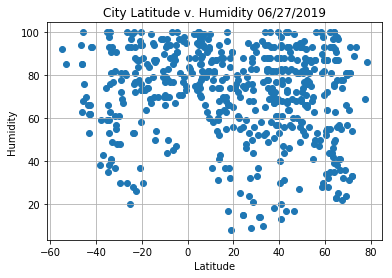

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude v. Humidity {todaydate}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude v. Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

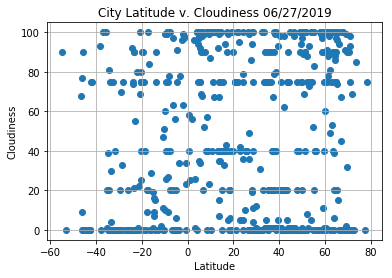

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude v. Cloudiness {todaydate}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude v. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

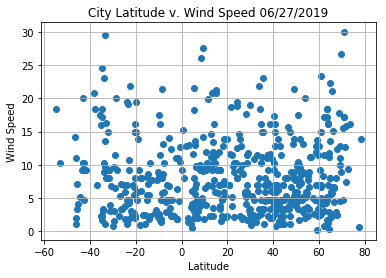

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude v. Wind Speed {todaydate}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude v. Wind Speed.png")

# Show plot
plt.show()